AKKA TECHNOLOGIES

As a global leader in engineering consulting and R&D services, AKKA supports the world's leading industry players in their digital transformation and throughout their entire product life cycle. 

Let's analyze AKKA's stocks and learn how to use Kaleido to generate PDF documents.

In [1]:
# Install all packages
# Finance market
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Libraries


# Packages for data analysis
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Date function
from datetime import datetime

# YFiance
import yfinance as yf
yf.pdr_override()

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Collecting data
Data = web.get_data_yahoo('AKA', period='1y' )

# Shape
Data.shape

[*********************100%***********************]  1 of 1 completed


(251, 6)

In [4]:
#Verify the data
Data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,7.61,7.87,7.45,7.81,7.81,273300
2022-02-09,7.93,8.17,7.81,7.94,7.94,190500
2022-02-10,7.70,8.35,7.66,8.06,8.06,228700
2022-02-11,7.98,8.25,7.71,7.95,7.95,273500
2022-02-14,7.96,8.18,7.83,7.96,7.96,208900


In [5]:
#Last regists
Data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,1.50,1.545,1.480,1.52,1.52,35200
2023-02-02,1.53,1.590,1.510,1.51,1.51,76200
2023-02-03,1.51,1.600,1.471,1.57,1.57,56800
2023-02-06,1.57,1.580,1.530,1.54,1.54,16700
2023-02-07,1.52,1.580,1.530,1.55,1.55,21910


In [6]:
#Informations
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-02-08 to 2023-02-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Moving average

The moving average is an indicator that is part of Stock Technical Analysis. With it, it is possible to identify the balance of prices in the market, observing trends of high, neutral, or low. The graphical representation of moving averages is usually made by a line that moves as new data is received for calculation.

What is the moving average?

In stock market analysis, moving average is a statistical calculation that provides the average price of a security over a specific time period (e.g., 50-day moving average, 200-day moving average) by continuously adding up the closing prices of a security over that time period and dividing the sum by the number of periods. Moving averages are used to identify trends and make investment decisions.

The moving average is an important indicator that smooths stock price data to form an indicator that follows the trend.

And how to calculate it?
Here is the step by step process to calculate a simple moving average:

1. Choose the time period for the moving average (e.g. 50 days, 100 days, 200 days).

2. Collect the closing price data for the security being analyzed for the chosen time period.

3. Add up the closing prices of the security for the first X days (where X is the chosen time period).

4. Divide the sum by the number of periods (X). This will give you the average price for the first X days.

5. Repeat steps 3 and 4 for each subsequent period (e.g. for the next 50 days, then the next 50 days, and so on) until you have calculated the average price for the entire chosen time period.

6. Plot the calculated moving averages on a chart along with the price data for the security. The moving average line will show the trend of the security over the chosen time period.

Note: There are different types of moving averages, such as simple moving average (SMA), exponential moving average (EMA), and weighted moving average (WMA). The calculation steps for these different types may vary slightly, but the basic concept remains the same.

Just use the formula: MA = Sum of closing prices ÷ Number of days

Consider the 5-day arithmetic moving average and its evolution over 3 days, where the daily closing prices are:
11,12,13,14,15,16, and 17.

First day of 5-day MA: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13
Second day of 5-day MA: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14
Third day of 5-day MA: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15



In [7]:
#simple mean
List = [11, 12, 13, 15, 16, 17]
from statistics import mean as Mean
print(f'Mean: { Mean(List) }')
print(f'Mean: { (11+12+13+15+16+17) / len(List) } ')

Mean: 14
Mean: 14.0 


In [8]:
Mean (List)

14

In [9]:
#Time of Moving average
n = 5

for Interval in range(3):
  print(f'{Interval}ª Day: { sum(List[Interval:n]) / 5 }')

0ª Day: 13.4
1ª Day: 11.2
2ª Day: 8.8


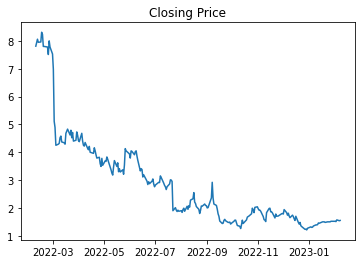

In [10]:
# Plot
plt.plot( Data['Close'] )
plt.title('Closing Price');

**Rolling function**

The rolling() function is a function in pandas that allows you to calculate rolling statistics on data.
It is very useful for calculating moving averages, standard deviations, sums, minimums, and maximums, among other statistics.

It is a powerful tool that allows you to calculate various moving or rolling statistics over a set window size. The "rolling" function in Pandas provides a flexible and efficient way to calculate various rolling statistics on time-series data.

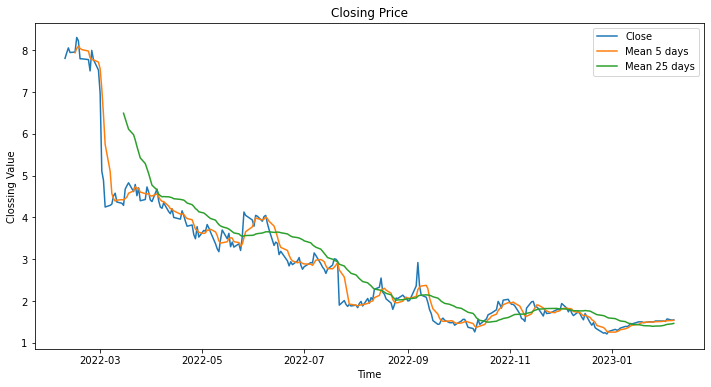

In [11]:
from pandas.core import window
Time = 5
Data['Close'].rolling( window=Time ).mean()

# Size of the figure
plt.figure( figsize=(12, 6) )

plt.plot( Data['Close'] )
plt.plot( Data['Close'].rolling( window=Time ).mean() )
plt.plot( Data['Close'].rolling( window=Time + 20 ).mean() )
plt.title('Closing Price')
plt.legend(['Close', 'Mean 5 days', 'Mean 25 days'])
plt.ylabel('Clossing Value')
plt.xlabel('Time');

**PLOTLY** is an open-source, interactive plotting library in Python that supports over 40 unique chart types, covering a wide range of statistical, financial, geographical, scientific, and three-dimensional use cases.

plotly.express (px) is a fast and easy way to create dynamic data visualizations.
plotly.graph_objects (go) is the low-level API that provides more control over your visualizations, but requires more code.

In [12]:
Periodo = 5
Data['Mean_Moving'] = Data['Close'].rolling( window=Time ).mean()

Figure = px.line(
    Data,
    y='Close',
    title='Closing'
)

Figure.show()

In [13]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Data.index,
        y=Data['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Closing Analysis of Akka Technologies',
    xaxis_title='Time',
    yaxis_title='Closing Price'
)

Figure_02.show()

**Candlestick Charts**

It is a financial charting style that describes the open, high, low, and close for a given x-coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sampling points where the close value is higher (lower) than the open value are referred to as bullish (bearish). By default, bullish candles are drawn in green, while bearish ones are drawn in red.

In [14]:
# Clandestik Graphic
Candlestick_Graphic = go.Figure(
    data=[
        go.Candlestick(
            x=Data.index,
            open=Data['Open'],
            high=Data['High'],
            low=Data['Low'],
            close=Data['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)


Candlestick_Graphic.update_layout(
    xaxis_rangeslider_visible=False,
    title='Closing Analysis of AKKA Technologies',
    xaxis_title='Time',
    yaxis_title='Closing Price'
)


Candlestick_Graphic.show()

Creating the report

In [15]:
# The figure
Figure = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotation', 'Closing')
)

# Layout and dimension
Figure.update_layout(
    width=1000,
    height=800,
    title_text='Advanced Analytics <br>Follow-up AKKA Technologies'
)

# Adding one graphic in the first position
Figure.add_trace(
    go.Candlestick(
        x=Data.index,
        open=Data['Open'],
        high=Data['High'],
        low=Data['Low'],
        close=Data['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

Figure.update_layout(
    xaxis_rangeslider_visible=False
)

# Adding one graphic in the second position
Figure.add_trace(
    go.Scatter(
        x=Data.index,
        y=Data['Close'],
        mode='lines',
        name='Closing',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figure.add_trace(
    go.Scatter(
        x=Data.index,
        y=Data['Mean_Moving'],
        mode='lines',
        name='Mean Moving',
        line=dict(color='red')
    ),
    row=2, col=1
)
Figure.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figure.add_annotation(
    showarrow=False,
    text='First day of Python Challenge by Data Vikings',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figure.add_annotation(
    showarrow=False,
    text='By: Amaryllis2021',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)
Figure.show()

**Exporting the PDF**

Kaleido is a cross-platform library for generating static images (e.g. png, svg, pdf, etc.) for web-based visualization libraries, with a particular focus on eliminating external dependencies. The initial focus of the project is to export plotly.js images from Python for use by plotly.py, but it is designed to be relatively straightforward to extend to other web-based visualization libraries and programming languages. The primary focus of Kaleido (at least initially) is to serve as a dependency for web-based visualization libraries, such as plotly.py. As such, the focus is on providing a programmatic API, rather than user-friendly.

In order to get the pdf file, we need to reset the server. To reset the runtime in Google Colab Research, you can follow these steps:

Click on the "Runtime" menu and select "Restart runtime..."
A confirmation dialog will appear, click on the "Restart" button to confirm.
This will stop and then start a new instance of the runtime environment, effectively resetting the state of the Colab environment. All variables, files, and installed packages will be lost, so be sure to save any important data before resetting the runtime.

In [16]:
#Restart the server
#Install Kaleido
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
Figure.write_image('Report.pdf')